In [115]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import numpy as np

from skimage import io

from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth

import glob

In [116]:
data = os.listdir("image_samples_resized")

FileNotFoundError: [Errno 2] No such file or directory: 'image_samples_resized'

In [3]:
newlist = []
for photos in data:
    if photos.endswith(".jpg"):
        newlist.append(photos)
print(newlist)

['urban_w_1_resized.jpg', 'animal_7_resized.jpg', 'promo_9_resized.jpg', 'object_7_resized.jpg', 'meme_7_resized.jpg', 'building_6_resized.jpg', 'quote_5_resized.jpg', 'candid_8_resized.jpg', 'selfie_1_resized.jpg', 'art_4_resized.jpg', 'landscape_w_5_resized.jpg', 'food_4_resized.jpg', 'body_6_resized.jpg', 'selfie_8_resized.jpg', 'candid_1_resized.jpg', 'urban_wo_4_resized.jpg', 'group_5_resized.jpg', 'art_1_resized.jpg', 'promo_5_resized.jpg', 'urban_wo_1_resized.jpg', 'candid_4_resized.jpg', 'quote_9_resized.jpg', 'body_3_resized.jpg', 'food_1_resized.jpg', 'object_2_resized.jpg', 'meme_2_resized.jpg', 'landscape_wo_2_resized.jpg', 'animal_2_resized.jpg', 'art_8_resized.jpg', 'urban_w_4_resized.jpg', 'selfie_4_resized.jpg', 'group_9_resized.jpg', 'food_8_resized.jpg', 'building_3_resized.jpg', 'body_9_resized.jpg', 'selfie_7_resized.jpg', 'quote_3_resized.jpg', 'animal_1_resized.jpg', 'object_1_resized.jpg', 'meme_1_resized.jpg', 'landscape_wo_1_resized.jpg', 'food_2_resized.jpg', 

In [4]:
# get list of images
#img = glob.glob("image_sample_copy/animal_images/*.jpg")

img = []
for d in newlist:
    img.append(io.imread("image_samples_resized/" +d).mean(axis=2).flatten())

In [5]:
img = np.array(img)
img.shape

(138, 51623)

In [6]:
img

array([[ 69.66666667,  63.        ,   4.66666667, ...,  66.66666667,
         82.        , 127.33333333],
       [149.66666667, 160.66666667, 153.66666667, ...,  47.        ,
         45.        ,  50.66666667],
       [ 43.        ,  43.        ,  43.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [173.33333333, 139.66666667,  57.66666667, ..., 111.        ,
         84.        ,  39.        ],
       [234.        , 234.        , 234.        , ..., 242.        ,
        241.        , 244.        ],
       [ 32.33333333,  17.        ,  24.66666667, ..., 108.66666667,
         39.33333333,  45.33333333]])

In [7]:
m,n = 209,247

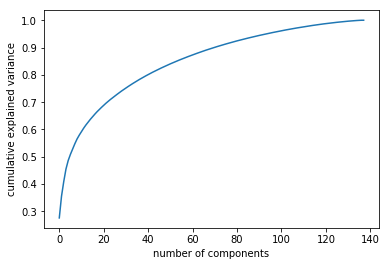

In [8]:
pca = PCA().fit(img)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [9]:
sklearn_pca = PCA(n_components=30)
Y_sklearn = sklearn_pca.fit_transform(img)

In [10]:
sklearn_pca.components_.shape

(30, 51623)

In [11]:
Y_sklearn

array([[  5371.24027542,  -1346.60695297,   -725.21246538, ...,
          -902.19415631,   1578.6184458 ,   -189.60693118],
       [ -5075.53643179,  -2585.02587379,  -2586.34166285, ...,
          -721.40907592,     27.24297749,   -972.54608821],
       [ -1612.22786125,   6096.30574431, -10813.61818718, ...,
           682.90577666,  -1190.23632495,   -341.73631573],
       ...,
       [ -3148.79584092,  -8748.25040137,   -210.5375992 , ...,
          2648.85649542,    565.81707428,   -663.53789545],
       [-18670.95729108,   3765.03454392,   1712.35035537, ...,
         -1037.98854962,  -1971.45148858,   1863.15198557],
       [  3427.5273023 ,   5501.47921623,  -3087.61146339, ...,
         -2648.23896068,   3473.39230746,   3530.75630617]])

In [12]:
Y_sklearn.shape

(138, 30)

IndexError: list index out of range

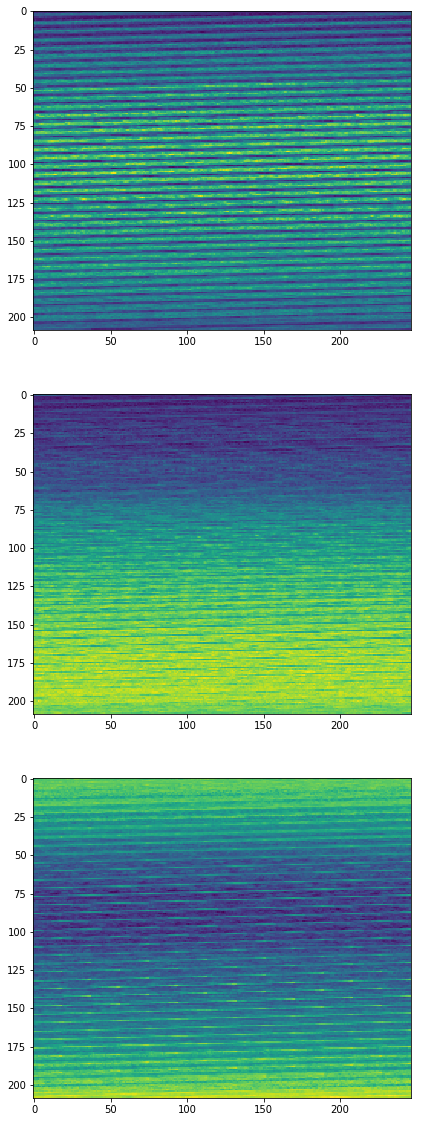

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(40, 20))

ax = [ax1,ax2,ax3]

for i in range(0,sklearn_pca.get_params()['n_components']):
    ax[i].imshow(sklearn_pca.components_[i,:].reshape(m,n))

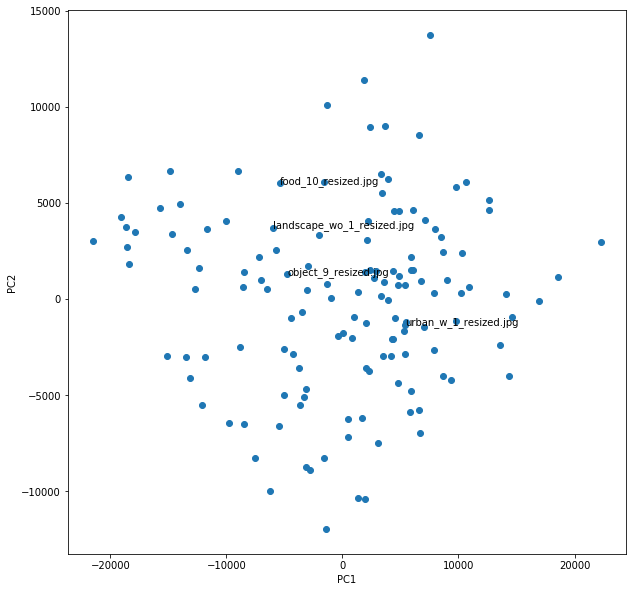

In [14]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.scatter(Y_sklearn[:,0],Y_sklearn[:,1])


# add labels to some of the points so we can manually go and check them to see differences
for i, txt in enumerate(newlist):
    if(i%40 == 0):
        ax.annotate(txt, (Y_sklearn[i,0],Y_sklearn[i,1]))

In [15]:
bandwidth = estimate_bandwidth(Y_sklearn, quantile=0.2, n_samples=500)
bandwidth

15611.157218063381

In [16]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms

MeanShift(bandwidth=15611.157218063381, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [17]:
ms.fit(Y_sklearn)

MeanShift(bandwidth=15611.157218063381, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [18]:
print(len(np.unique(ms.labels_)))

2


In [19]:
ms.cluster_centers_

array([[ 2.51755492e+03, -8.98118149e+02, -2.59693090e+02,
        -1.66908829e+02, -3.70493369e+01,  2.43864537e+02,
         3.36189962e+01,  3.16427806e+01, -3.93062862e+01,
        -5.39978588e+01, -6.46543664e+01, -4.60763280e+01,
         3.10886061e+01, -5.34479950e+00, -1.48204125e+01,
        -7.45404891e+01,  5.03442387e+01,  3.58090720e+01,
        -3.80961882e+01, -8.66530766e+01, -1.53848260e+02,
        -5.36780869e+01, -9.73172866e+01,  9.18955177e+01,
        -8.09132038e+01,  5.70015930e+01,  5.84824512e+01,
        -5.26225680e+01,  7.86267318e+01, -2.22163482e+01],
       [-7.15525829e+03,  2.19855646e+03, -1.00142905e+03,
         1.06433358e+04,  8.62832832e+03, -6.27335984e+02,
        -5.03280433e+02,  5.28006056e+03, -3.74440402e+03,
        -2.34236819e+03,  4.60085538e+03,  8.83456612e+01,
        -1.02836658e+03, -1.63880981e+02, -2.24821988e+03,
         2.64839194e+03,  2.26663383e+03, -1.99420560e+03,
         2.81961666e+03, -1.04849964e+03,  1.23132930e+

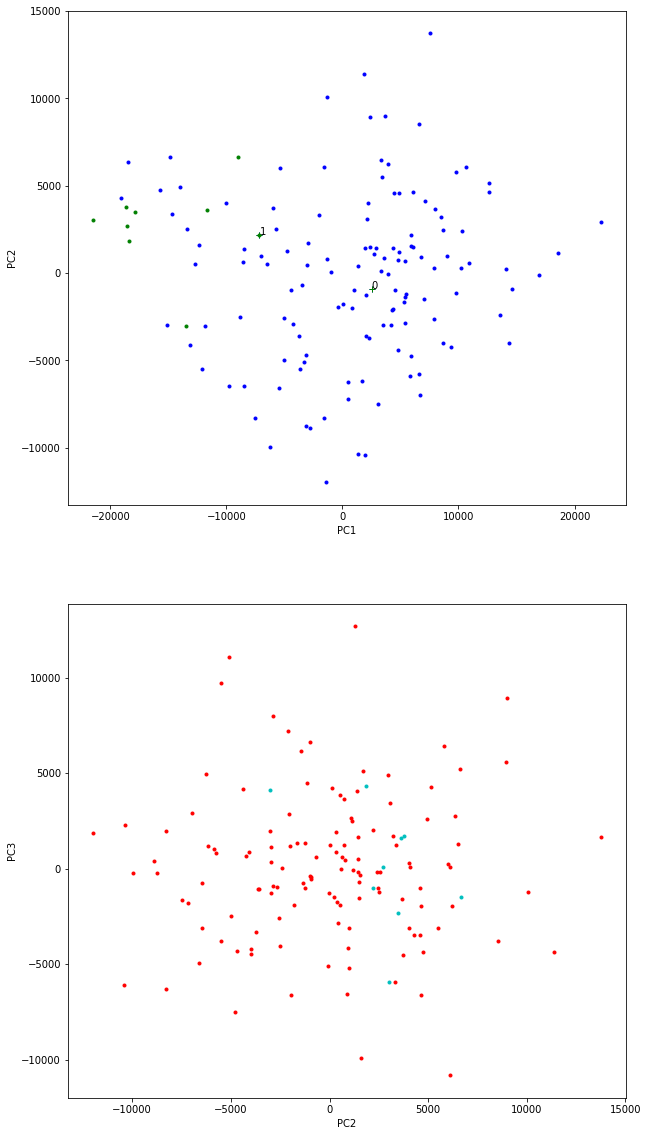

In [20]:
from itertools import cycle

fig, (ax1,ax2) = plt.subplots(2,figsize=(10,20))


colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

# 1st / 2nd PCs
for i in np.unique(ms.labels_):
    c = next(colors)
    ax1.plot(Y_sklearn[ms.labels_==i,0],Y_sklearn[ms.labels_==i,1],c+'.')
    ax1.plot(ms.cluster_centers_[:,0],ms.cluster_centers_[:,1],c+'+')
    ax1.annotate(i, (ms.cluster_centers_[i,0]+10,ms.cluster_centers_[i,1]))
    ax1.set_xlabel("PC1")
    ax1.set_ylabel("PC2")
    
# 2nd / 3rd PCs
for i in np.unique(ms.labels_):
    c = next(colors)
    ax2.plot(Y_sklearn[ms.labels_==i,1],Y_sklearn[ms.labels_==i,2],c + '.')
    ax2.set_xlabel("PC2")
    ax2.set_ylabel("PC3")


In [21]:
from sklearn.cluster import KMeans    

In [22]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(Y_sklearn)

In [23]:
kmeans.labels_

array([3, 2, 2, 0, 1, 0, 1, 0, 0, 1, 3, 3, 2, 1, 2, 2, 0, 3, 1, 3, 3, 0,
       0, 3, 1, 2, 2, 2, 0, 3, 0, 2, 1, 2, 1, 2, 2, 0, 1, 3, 2, 3, 0, 3,
       0, 2, 2, 1, 2, 0, 2, 3, 2, 2, 0, 3, 2, 3, 2, 2, 3, 0, 0, 0, 3, 2,
       0, 0, 2, 0, 3, 2, 0, 3, 3, 2, 1, 1, 3, 2, 1, 0, 1, 3, 1, 0, 3, 2,
       3, 2, 3, 0, 1, 3, 0, 1, 0, 2, 0, 1, 1, 1, 0, 3, 0, 2, 0, 1, 3, 3,
       2, 1, 2, 0, 0, 3, 3, 0, 1, 0, 1, 1, 0, 2, 0, 2, 3, 3, 3, 0, 2, 0,
       0, 3, 0, 2, 1, 0], dtype=int32)

In [24]:
kmeans.cluster_centers_

array([[ 8.35204371e+03,  3.29250484e+03,  1.82128453e+02,
         5.99466791e+02, -1.25492781e+01,  1.94780202e+02,
        -2.05009206e+02,  1.14129421e+01, -1.62111379e+02,
        -1.11813830e+02, -4.52957269e+01, -9.38940766e+01,
         2.03585995e+02, -3.40652578e+02, -3.23112378e+02,
        -5.80148478e+01, -1.87304247e+02, -6.94962751e+01,
        -1.84888022e+01,  1.72207443e+01, -6.32935025e+01,
        -8.51377553e+01,  6.04687845e+01, -7.01292264e+01,
         4.23661840e+01,  1.55503448e+01, -1.15125829e+01,
        -1.17954722e+02,  4.80897336e+01,  2.18054351e+02],
       [-1.36130960e+04,  2.11054599e+03,  8.57094438e+02,
         1.50255390e+02,  2.26460014e+02, -2.34047758e+02,
        -8.42338819e+01, -6.34150816e+02,  4.27080312e+02,
        -5.29183328e+02, -1.74713250e+02, -1.57689379e+02,
        -3.08231335e+01, -4.72563116e+00,  3.08602209e+02,
         1.59965910e+02,  2.05517947e+02, -5.40968471e+01,
        -1.69844218e+02, -7.84694094e+01,  1.34971179e+

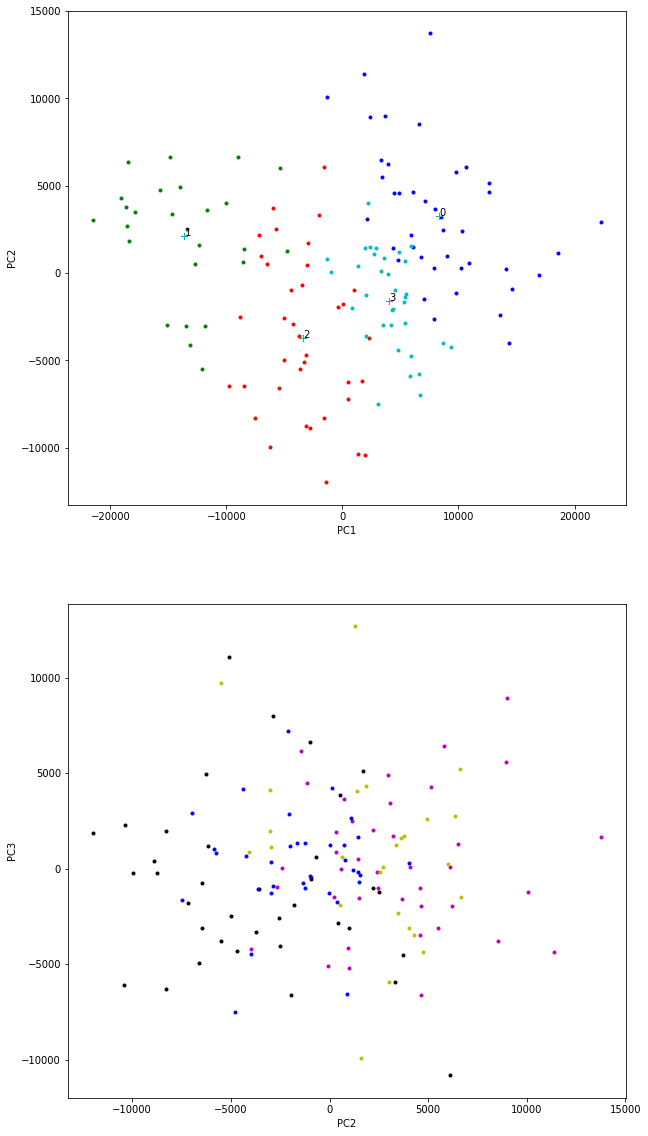

In [25]:
from itertools import cycle

fig, (ax1,ax2) = plt.subplots(2,figsize=(10,20))


colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

# 1st / 2nd PCs
for i in np.unique(kmeans.labels_):
    c = next(colors)
    ax1.plot(Y_sklearn[kmeans.labels_==i,0],Y_sklearn[kmeans.labels_==i,1],c+'.')
    ax1.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c+'+')
    ax1.annotate(i, (kmeans.cluster_centers_[i,0]+10,kmeans.cluster_centers_[i,1]))
    ax1.set_xlabel("PC1")
    ax1.set_ylabel("PC2")
    
# 2nd / 3rd PCs
for i in np.unique(kmeans.labels_):
    c = next(colors)
    ax2.plot(Y_sklearn[kmeans.labels_==i,1],Y_sklearn[kmeans.labels_==i,2],c + '.')
    ax2.set_xlabel("PC2")
    ax2.set_ylabel("PC3")

In [26]:
import pandas as pd
df = pd.DataFrame()

In [27]:
df["image"] = newlist
#df['pca_components'] = Y_sklearn
df['k_means_cluster'] = kmeans.labels_

In [28]:
df.sort_values(by='k_means_cluster', ascending=True)

image  k_means_cluster
137        selfie_6_resized.jpg                0
62           meme_4_resized.jpg                0
119           art_3_resized.jpg                0
61         object_4_resized.jpg                0
28            art_8_resized.jpg                0
117        animal_9_resized.jpg                0
30         selfie_4_resized.jpg                0
114         group_7_resized.jpg                0
91            art_5_resized.jpg                0
113        candid_3_resized.jpg                0
94         candid_9_resized.jpg                0
37         animal_1_resized.jpg                0
96        animal_10_resized.jpg                0
54           body_5_resized.jpg                0
98         animal_6_resized.jpg                0
106       urban_w_3_resized.jpg                0
42       building_9_resized.jpg                0
44         candid_7_resized.jpg                0
104        animal_5_resized.jpg                0
102        object_5_resized.jpg                0
85           body_7_resized.jpg                0
22           body_3_resized.jpg                0
63        urban_w_2_resized.jpg                0
122        quote_10_resized.jpg                0
134          body_8_resized.jpg                0
3          object_7_resized.jpg                0
81    landscape_w_1_resized.jpg                0
5        building_6_resized.jpg                0
72         object_3_resized.jpg                0
7          candid_8_resized.jpg                0
..                          ...              ...
23           food_1_resized.jpg                3
20         candid_4_resized.jpg                3
128      urban_wo_3_resized.jpg                3
127         group_2_resized.jpg                3
19       urban_wo_1_resized.jpg                3
17            art_1_resized.jpg                3
11           food_4_resized.jpg                3
116          body_4_resized.jpg                3
108        selfie_3_resized.jpg                3
39           meme_1_resized.jpg                3
74            art_9_resized.jpg                3
73        urban_w_5_resized.jpg                3
83         promo_10_resized.jpg                3
70   landscape_wo_3_resized.jpg                3
86           food_5_resized.jpg                3
64         animal_4_resized.jpg                3
88          group_4_resized.jpg                3
60   landscape_wo_4_resized.jpg                3
115          food_6_resized.jpg                3
90         selfie_9_resized.jpg                3
57         selfie_2_resized.jpg                3
55           food_7_resized.jpg                3
51         object_8_resized.jpg                3
103  landscape_wo_5_resized.jpg                3
43    landscape_w_3_resized.jpg                3
41           food_2_resized.jpg                3
78         candid_5_resized.jpg                3
109      building_4_resized.jpg                3
93       building_7_resized.jpg                3
0         urban_w_1_resized.jpg                3

[138 rows x 2 columns]

In [29]:
df["k_means_cluster"].value_counts()

0    41
2    37
3    34
1    26
Name: k_means_cluster, dtype: int64

In [30]:
df[df["k_means_cluster"]==0]

image  k_means_cluster
3         object_7_resized.jpg                0
5       building_6_resized.jpg                0
7         candid_8_resized.jpg                0
8         selfie_1_resized.jpg                0
16         group_5_resized.jpg                0
21         quote_9_resized.jpg                0
22          body_3_resized.jpg                0
28           art_8_resized.jpg                0
30        selfie_4_resized.jpg                0
37        animal_1_resized.jpg                0
42      building_9_resized.jpg                0
44        candid_7_resized.jpg                0
49        animal_8_resized.jpg                0
54          body_5_resized.jpg                0
61        object_4_resized.jpg                0
62          meme_4_resized.jpg                0
63       urban_w_2_resized.jpg                0
66       candid_10_resized.jpg                0
67        selfie_5_resized.jpg                0
69          food_9_resized.jpg                0
72        object_3_resized.jpg                0
81   landscape_w_1_resized.jpg                0
85          body_7_resized.jpg                0
91           art_5_resized.jpg                0
94        candid_9_resized.jpg                0
96       animal_10_resized.jpg                0
98        animal_6_resized.jpg                0
102       object_5_resized.jpg                0
104       animal_5_resized.jpg                0
106      urban_w_3_resized.jpg                0
113       candid_3_resized.jpg                0
114        group_7_resized.jpg                0
117       animal_9_resized.jpg                0
119          art_3_resized.jpg                0
122       quote_10_resized.jpg                0
124     building_8_resized.jpg                0
129        body_10_resized.jpg                0
131      object_10_resized.jpg                0
132    building_10_resized.jpg                0
134         body_8_resized.jpg                0
137       selfie_6_resized.jpg                0

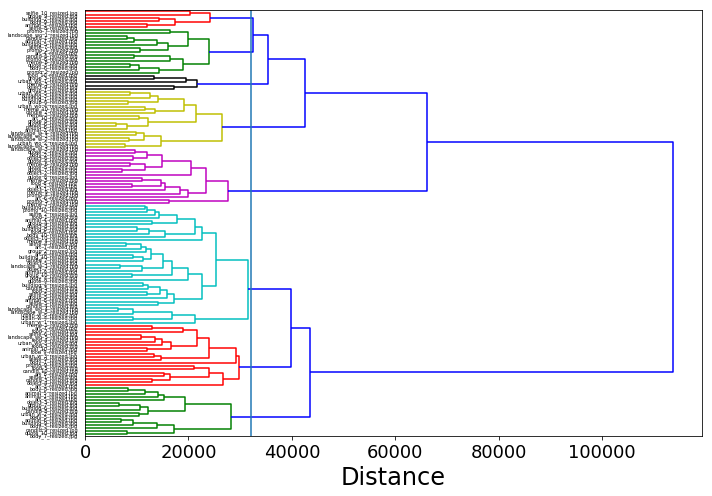

In [113]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from scipy.cluster.hierarchy import fcluster
from matplotlib import pyplot as plt

linked = linkage(Y_sklearn, 'ward')

max_d = 32000
clusters = fcluster(linked, max_d, criterion='distance')
    
df['cluster'] = clusters

labelList = newlist

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            show_contracted=True,
            color_threshold=32000)
plt.xlabel('Distance', fontsize=24)
plt.xticks(fontsize = 18)
plt.tight_layout()  # fixes margins

plt.axvline(x=32000) #plot vertical line

plt.show()

In [114]:
clusters

array([3, 7, 2, 3, 4, 1, 4, 1, 2, 7, 3, 2, 7, 8, 7, 5, 3, 3, 4, 6, 3, 3,
       1, 3, 4, 5, 5, 5, 2, 3, 3, 8, 4, 5, 8, 7, 7, 1, 4, 3, 7, 3, 1, 5,
       3, 5, 6, 4, 5, 3, 7, 3, 5, 5, 1, 2, 2, 3, 5, 7, 3, 2, 3, 1, 3, 5,
       2, 3, 8, 2, 5, 6, 1, 3, 3, 5, 8, 4, 3, 6, 7, 3, 4, 3, 4, 1, 2, 5,
       3, 5, 2, 1, 7, 3, 1, 4, 2, 7, 1, 4, 4, 4, 3, 2, 1, 8, 2, 4, 3, 3,
       5, 4, 7, 2, 1, 3, 3, 3, 7, 2, 6, 4, 1, 5, 3, 2, 2, 3, 2, 3, 7, 3,
       3, 3, 1, 5, 4, 2], dtype=int32)

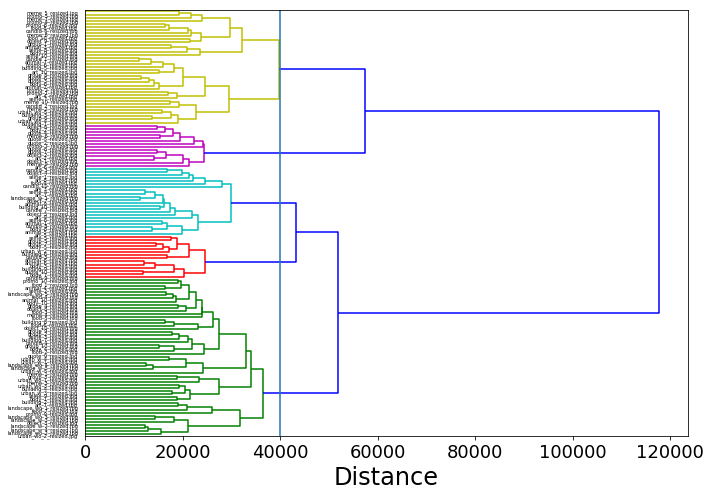

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from scipy.cluster.hierarchy import fcluster
from matplotlib import pyplot as plt

linked = linkage(img, 'ward')

max_d = 40000
clusters_img = fcluster(linked, max_d, criterion='distance')
    
df['cluster_img'] = clusters_img

labelList = newlist

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            show_contracted=True,
            color_threshold=40000)
plt.xlabel('Distance', fontsize=24)
plt.xticks(fontsize = 18)
plt.tight_layout()  # fixes margins

plt.axvline(x=40000) #plot vertical line

plt.show()

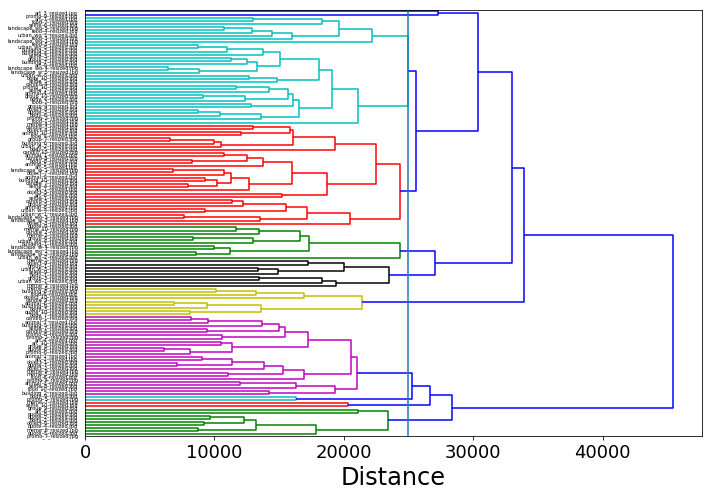

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from scipy.cluster.hierarchy import fcluster
from matplotlib import pyplot as plt

linked = linkage(Y_sklearn, 'complete')

max_d = 25000
cluster_complete = fcluster(linked, max_d, criterion='distance')
    
df['cluster_complete'] = cluster_complete

labelList = newlist

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            color_threshold=25000)
plt.xlabel('Distance', fontsize=24)
plt.xticks(fontsize = 18)
plt.tight_layout()  # fixes margins

plt.axvline(x=25000) #plot vertical line

plt.show()

In [93]:
from sklearn.cluster import AgglomerativeClustering

In [94]:
clustering = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward').fit(Y_sklearn)
clustering 

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=8,
            pooling_func=<function mean at 0x1075a82f0>)

In [95]:
clustering.labels_

array([0, 7, 2, 0, 5, 1, 5, 1, 2, 7, 0, 2, 7, 3, 7, 4, 0, 0, 5, 6, 0, 0,
       1, 0, 5, 4, 4, 4, 2, 0, 0, 3, 5, 4, 3, 7, 7, 1, 5, 0, 7, 0, 1, 4,
       0, 4, 6, 5, 4, 0, 7, 0, 4, 4, 1, 2, 2, 0, 4, 7, 0, 2, 0, 1, 0, 4,
       2, 0, 3, 2, 4, 6, 1, 0, 0, 4, 3, 5, 0, 6, 7, 0, 5, 0, 5, 1, 2, 4,
       0, 4, 2, 1, 7, 0, 1, 5, 2, 7, 1, 5, 5, 5, 0, 2, 1, 3, 2, 5, 0, 0,
       4, 5, 7, 2, 1, 0, 0, 0, 7, 2, 6, 5, 1, 4, 0, 2, 2, 0, 2, 0, 7, 0,
       0, 0, 1, 4, 5, 2])

In [96]:
df["hierarchical_cluster(8)"] = clustering.labels_

In [38]:
from sklearn.cluster import SpectralClustering

In [39]:
spectral_clustering = SpectralClustering(n_clusters=4,
         assign_labels="discretize",
         random_state=0).fit(Y_sklearn)

df["spectral_clustering"] = spectral_clustering.labels_

spectral_clustering 

/Users/jeffreysternberg/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=4, n_init=10, n_jobs=1,
          n_neighbors=10, random_state=0)

In [98]:
df.sort_values(by= 'hierarchical_cluster(8)', ascending=True)

image  k_means_cluster  cluster  cluster_img  \
0         urban_w_1_resized.jpg                3        3            1   
109      building_4_resized.jpg                3        3            1   
29        urban_w_4_resized.jpg                3        3            1   
30         selfie_4_resized.jpg                0        3            3   
108        selfie_3_resized.jpg                3        3            1   
64         animal_4_resized.jpg                3        3            1   
102        object_5_resized.jpg                0        3            3   
39           meme_1_resized.jpg                3        3            1   
41           food_2_resized.jpg                3        3            1   
93       building_7_resized.jpg                3        3            1   
44         candid_7_resized.jpg                0        3            3   
88          group_4_resized.jpg                3        3            1   
49         animal_8_resized.jpg                0        3            2   
51         object_8_resized.jpg                3        3            1   
83         promo_10_resized.jpg                3        3            1   
81    landscape_w_1_resized.jpg                0        3            3   
78         candid_5_resized.jpg                3        3            2   
74            art_9_resized.jpg                3        3            3   
57         selfie_2_resized.jpg                3        3            1   
73        urban_w_5_resized.jpg                3        3            1   
60   landscape_wo_4_resized.jpg                3        3            1   
62           meme_4_resized.jpg                0        3            1   
115          food_6_resized.jpg                3        3            1   
116          body_4_resized.jpg                3        3            1   
67         selfie_5_resized.jpg                0        3            2   
16          group_5_resized.jpg                0        3            2   
10    landscape_w_5_resized.jpg                3        3            1   
129         body_10_resized.jpg                0        3            1   
124      building_8_resized.jpg                0        3            1   
131       object_10_resized.jpg                0        3            1   
..                          ...              ...      ...          ...   
4            meme_7_resized.jpg                1        4            5   
47            art_2_resized.jpg                1        4            4   
101          meme_5_resized.jpg                1        4            5   
100        object_6_resized.jpg                1        4            4   
99           meme_6_resized.jpg                1        4            4   
38         object_1_resized.jpg                1        4            4   
95          quote_4_resized.jpg                1        4            4   
136         quote_2_resized.jpg                1        4            4   
32           food_8_resized.jpg                1        4            5   
77          quote_8_resized.jpg                1        4            4   
71           meme_3_resized.jpg                2        6            1   
46          group_3_resized.jpg                2        6            1   
79          group_1_resized.jpg                2        6            5   
19       urban_wo_1_resized.jpg                3        6            1   
120        object_9_resized.jpg                1        6            5   
92          promo_1_resized.jpg                1        7            5   
1          animal_7_resized.jpg                2        7            5   
130        candid_6_resized.jpg                2        7            5   
9             art_4_resized.jpg                1        7            5   
80          food_10_resized.jpg                1        7            5   
12           body_6_resized.jpg                2        7            5   
14         candid_1_resized.jpg                2        7            5   
118         promo_7_resized.jp

In [103]:
cluster = df[df["cluster"]==1].sort_values(by= 'image', ascending=True)
cluster_1 = cluster['image'].tolist()

In [104]:
cluster_1

['animal_1_resized.jpg',
 'animal_5_resized.jpg',
 'animal_6_resized.jpg',
 'art_5_resized.jpg',
 'body_3_resized.jpg',
 'body_5_resized.jpg',
 'body_7_resized.jpg',
 'body_8_resized.jpg',
 'building_6_resized.jpg',
 'building_9_resized.jpg',
 'candid_8_resized.jpg',
 'candid_9_resized.jpg',
 'group_7_resized.jpg',
 'object_3_resized.jpg',
 'quote_10_resized.jpg',
 'urban_w_2_resized.jpg']

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img= []
for image in cluster_0:
    img.append(io.imread("image_samples_resized/" +image))
    #img = io.imread("image_samples_resized/" +image)
    #img = mpimg.imread(image)
    #plt.imshow(io.imread("image_samples_resized/" +image))

In [90]:
len(img)

39

In [91]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [92]:
show_images(img, cols = 3, titles = cluster_0)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
